# Gráfico de áreas apiladas 

In [90]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from vega_datasets import data

In [91]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [92]:
df_SECOP = pd.read_csv('Datos_SECOP_LT.csv', 
                 sep = ',',
                 index_col=0,
                 dtype={
                     'Nit Entidad': str
                 })
df_SECOP.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Duración mes
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,2020-01-21,34387200,Contratación directa,8,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,8.0
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,2020-04-29,29117793,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,0.0
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,2020-02-03,29816133,Contratación directa,165,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,5.5
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,2020-10-15,6443255,Contratación directa,51,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,1.7
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,2021-01-29,2980278,Contratación régimen especial,1,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Decreto 092 de 2017,1.0


In [93]:
df_SECOP['Fecha de Publicacion del Proceso'] = pd.to_datetime(df_SECOP['Fecha de Publicacion del Proceso'],format='%Y-%m-%d')

In [94]:
df_SECOP['Año'] = df_SECOP['Fecha de Publicacion del Proceso'].dt.year.astype('string')
df_SECOP['Mes'] = df_SECOP['Fecha de Publicacion del Proceso'].dt.month

In [95]:
import locale
locale.setlocale(locale.LC_TIME, '')

'Spanish_Spain.1252'

In [96]:
import calendar
df_SECOP['NombreMes'] = df_SECOP['Mes'].apply(lambda x: calendar.month_name[x])
df_SECOP['NombreMes'].value_counts()

enero         206457
febrero        92421
agosto         60862
noviembre      58880
octubre        57221
julio          55168
septiembre     53887
marzo          44544
diciembre      40839
mayo           39375
junio          36141
abril          35967
Name: NombreMes, dtype: int64

In [97]:
anios = ["2019","2020"]
df_SECOP_leticia = df_SECOP[(df_SECOP['Ciudad Entidad'] == "Leticia") & (df_SECOP['Año'].isin(anios)) & (df_SECOP['Adjudicado'] == "Si")]

Conteo_leticia_mes = pd.pivot_table(df_SECOP_leticia, 
                                values='Valor Total Adjudicacion', 
                                index=['Año','NombreMes','Mes'],
                                #columns=['NombreMes'], 
                                aggfunc=np.sum)

Conteo_leticia_mes = pd.DataFrame(Conteo_leticia_mes)
Conteo_leticia_mes.reset_index(inplace=True)
Conteo_leticia_mes = Conteo_leticia_mes.rename(columns = {'index':'Año','Valor Total Adjudicacion':'Valor'})

In [103]:
alt.Chart(Conteo_leticia_mes
).mark_area(opacity = 0.3
).encode(
    x = alt.X("Año:O",
    #x = "Año:Q",
            scale=alt.Scale(domain = ["2019","2020"])
             ),
    y = alt.Y("Valor:Q", 
              stack=None,
            axis = alt.Axis(format='$.2f')),
    color = alt.Order(
        #"NombreMes:O",
        "NombreMes:N",
        sort="ascending")
).properties(
    width=500,
    height=300
)

alt.Chart(...)

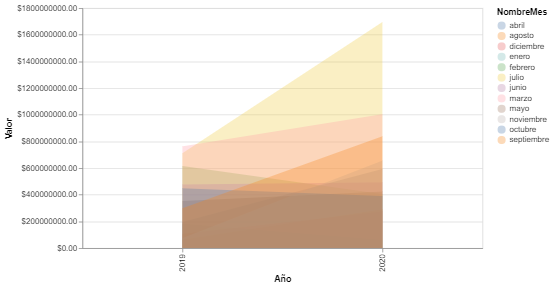

In [100]:
alt.Chart(Conteo_leticia_mes).transform_calculate(
    order="{'diciembre':0, 'noviembre': 1, 'octubre': 2, 'septiembre':3, 'agosto':4, 'julio':5, 'junio':6, 'mayo':7, 'abril':8, 'marzo':9, 'febrero':10, 'enero':11}[datum.NombreMes]"  
).mark_area(opacity = 0.5).encode(
    x="Año:O",
    y=alt.Y("Valor:Q", 
              stack="normalize",
              axis = alt.Axis(format='%')
             ),
    color=alt.Color("NombreMes", sort=alt.SortField("order", "descending")),
    order="order:O"
).properties(
    width=500,
    height=300
)

alt.Chart(...)

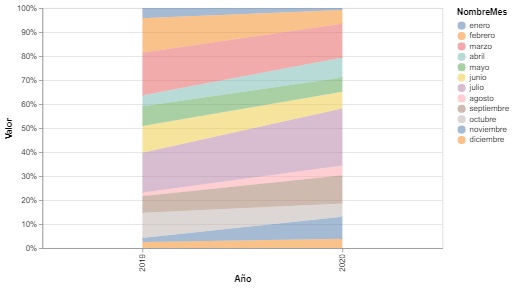